In [26]:
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
from tqdm.notebook import tqdm

In [27]:
##TOURNAMENT SIZE=3
##ORDERED CROSSOVER
##SHUFFULE POSITION MUTATION

In [28]:
P_CROSSOVER=0.9
P_MUTATION=0.1
POPULATION_SIZE = 300
MAX_GENERATIONS = 200

In [29]:
CITIES = [
             (16.47,96.10),
             (16.47,94.44),
             (20.09,92.52),
            (22.39,93.37),
            (25.23,97.24),
            (22.00,96.05),
            (20.47,97.02),
            (17.20,96.29),
            (16.30,97.38),
            (14.05,98.12),
            (16.53,97.38),
            (21.52,95.59),
            (19.41,97.13),
            (20.09,94.55)
            ]

In [30]:
CHROMOSOME_SIZE = len(CITIES)

In [31]:
def get_distance(coords_1,coords_2):
    return geopy.distance.geodesic(coords_1,coords_2).km
def get_fitness(individual,CITIES):
    total_fitness = 0
    for i in range(len(individual)):
        if i == len(individual)-1:
            total_fitness+=get_distance(CITIES[individual[0]],CITIES[individual[i]])
        else:
            total_fitness+=get_distance(CITIES[individual[i]],CITIES[individual[i+1]])
    return -total_fitness
def get_population_fitness(population,CITIES):
    population_fitness = [get_fitness(individual,CITIES) for individual in population]
    return population_fitness

In [32]:
def mutation(POPULATION,P_MUTATION):
    for i in range(len(POPULATION)):
        for j in range(len(POPULATION[i])):
            if np.random.uniform() < P_MUTATION:
                ptx = np.random.randint(0,len(POPULATION[i]))
                tmp = POPULATION[i][j]
                POPULATION[i][j] = POPULATION[i][ptx]
                POPULATION[i][ptx] = tmp
    return POPULATION

In [33]:
def selection(scores,TOURNAMENT_SIZE):
    SELECTED = []
    while len(SELECTED) != len(scores):
        tournament_indices = []
        tournament_scores = []
        while len(tournament_indices) != TOURNAMENT_SIZE:
            indiv = np.random.randint(0,len(scores))
            tournament_indices.append(indiv)
            tournament_scores.append(scores[indiv])
        winner = np.argmax(tournament_scores)
        SELECTED.append(tournament_indices[winner])
    return SELECTED

In [34]:
def cross_over(POPULATION,SELECTED,P_CROSSOVER):
    NEW_POPULATION = []
    CHROMOSOME_LENGTH = len(POPULATION[0])
    while len(NEW_POPULATION) != len(SELECTED):
        indiv1 = np.random.randint(0,len(SELECTED))
        indiv2 = np.random.randint(0,len(SELECTED))
        indiv1 = POPULATION[SELECTED[indiv1]]
        indiv2 = POPULATION[SELECTED[indiv2]]
        if np.random.uniform() > P_CROSSOVER:
            NEW_POPULATION.append(indiv1)
            NEW_POPULATION.append(indiv2)
            continue
        pt1 = np.random.randint(0,CHROMOSOME_LENGTH)
        pt2 = np.random.randint(pt1,CHROMOSOME_LENGTH)
        ###################PROCESS INDIVIDUAL 1
        new_indiv1 = np.array(indiv2,copy=True)
        copy_bits= indiv2[pt1:pt2]
        ctr = 0
        xctr = pt2
        while ctr != CHROMOSOME_LENGTH:
            xctr = xctr%CHROMOSOME_LENGTH
            if indiv1[ctr] not in copy_bits:
                new_indiv1[xctr] = indiv1[ctr]
                xctr+=1
            ctr+=1
        ##################PROCESS INDIVIDUAL 2
        new_indiv2 = np.array(indiv1,copy=True)
        copy_bits= indiv1[pt1:pt2]
        ctr = 0
        xctr = pt2
        while ctr != CHROMOSOME_LENGTH:
            xctr = xctr%CHROMOSOME_LENGTH
            if indiv2[ctr] not in copy_bits:
                new_indiv2[xctr] = indiv2[ctr]
                xctr+=1
            ctr+=1
        NEW_POPULATION.append(new_indiv1)
        NEW_POPULATION.append(new_indiv2)
    return NEW_POPULATION

In [35]:
########GENERATING POPULATION
POPULATION = []
while len(POPULATION) != POPULATION_SIZE:
    POPULATION.append(np.random.permutation(np.arange(CHROMOSOME_SIZE)))

In [36]:
MIN_DISTANCES = []
AVERAGE_DISTANCES = []
for generation in tqdm(range(MAX_GENERATIONS)):
    scores = get_population_fitness(POPULATION,CITIES)
    MIN_DISTANCES.append(-(np.max(scores)))
    AVERAGE_DISTANCES.append(-(np.mean(scores)))
    ####SELECTION
    SELECTED = selection(scores,3) 
    ####CROSSOVER
    POPULATION = cross_over(POPULATION,SELECTED,P_CROSSOVER)
    ####MUTATION
    POPULATION = mutation(POPULATION,P_MUTATION)
    

  0%|          | 0/200 [00:00<?, ?it/s]

C:\Users\Mrinmoy Mondal\AppData\Local\Temp\ipykernel_9388\3800050412.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('MIN','AVERAGE')


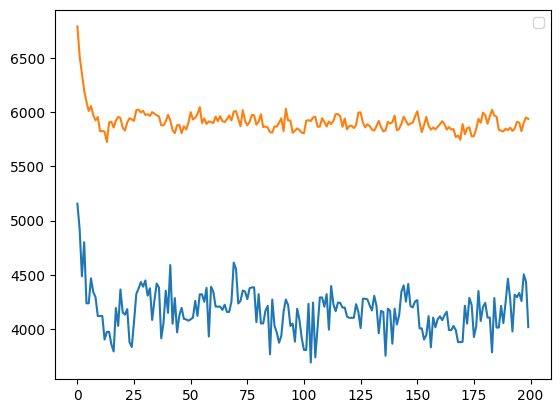

In [37]:
plt.plot(MIN_DISTANCES)
plt.plot(AVERAGE_DISTANCES)
plt.legend('MIN','AVERAGE')
plt.show()

In [44]:
for indiv in POPULATION:
    z = np.unique(indiv)
    if len(z) != CHROMOSOME_SIZE:
        print("ERROR!!!!!")
        break